# Project: Wrangling and Analyze Data

In [848]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import requests
import json

## Data Gathering



In [849]:
twitter_achive = pd.read_csv('twitter-archive-enhanced.csv')

Using the Requests library to download the tweet image prediction (image_predictions.tsv) from url

In [850]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictionss.tsv', mode='wb') as file: 
    file.write(response.content)

In [851]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [852]:
with open('tweet.json', encoding="utf8") as file:
    data = json.load(file)

In [853]:
additional_tweet = pd.DataFrame(data)

## Assessing Data
In this section, I will detect and document at least **eight (8) quality issues and two (2) tidiness issue**. Using **both** visual assessment and programmatic assessement to assess the data.



In [854]:
pd.set_option('display.max_colwidth', 60)

In [855]:
twitter_achive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                                        source  \
0  <a href="http://twitter.com/download/iphone" rel="nofoll...   
1  <a href="http://twitter.com/download/iphone" rel="nofoll...   
2  <a href="http://twitter.com/download/iphone" rel="nofoll...   
3  <a href="http://twitter.com/download/iphone" rel="nofoll...   
4  <a href="http://twitter.com/download/iphone" rel="nofoll...   

                                                          text  \
0  This is Phineas. He's a mystical boy. Only ever appears ...   
1  This is Tilly. She's just checking pup on you. Hopes you...   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. L...   
3  This is Darla. She commenced a snooze mid meal. 13/10 ha...   
4  This is Franklin. He would like you to stop calling him ...   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaN   
1                  NaN                       NaN                        NaN   
2                  NaN                       NaN                        NaN   
3                  NaN                       NaN                        NaN   
4                  NaN                       NaN                        NaN   

                                                 expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/...   
1  https://twitter.com/dog_rates/status/892177421306343426/...   
2  https://twitter.com/dog_rates/status/891815181378084864/...   
3  https://twitter.com/dog_rates/status/891689557279858688/...   
4  https://twitter.com/dog_rates/status/891327558926688256/...   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  
0                13                  10   Phineas  None    None   None  None  
1                13                  10     Tilly  None    None   None  None  
2                12                  10    Archie  None    None   None  None  
3                13                  10     Darla  None    None   None  None  
4                12                  10  Franklin  None    None   None  None

In [856]:
twitter_achive.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
232   847962785489326080                    NaN                  NaN   
60    880465832366813184                    NaN                  NaN   
1484  693231807727280129                    NaN                  NaN   
2050  671497587707535361                    NaN                  NaN   
874   761292947749015552                    NaN                  NaN   

                      timestamp  \
232   2017-04-01 00:04:17 +0000   
60    2017-06-29 16:39:47 +0000   
1484  2016-01-30 00:38:37 +0000   
2050  2015-12-01 01:14:35 +0000   
874   2016-08-04 20:09:17 +0000   

                                                           source  \
232   <a href="http://twitter.com/download/iphone" rel="nofoll...   
60    <a href="http://twitter.com/download/iphone" rel="nofoll...   
1484  <a href="http://twitter.com/download/iphone" rel="nofoll...   
2050  <a href="http://twitter.com/download/iphone" rel="nofoll...   
874   <a href="http://twitter.com/download/iphone" rel="nofoll...   

                                                             text  \
232   This is Georgie. He's very shy. Only puppears when calle...   
60    This is Bella. She had her first beach experience this m...   
1484  This is Bodie. He's not proud of what he did, but it nee...   
2050  This is Pip. He is a ship captain. Many years of experie...   
874   Meet Bonaparte. He's pupset because it's cloudy at the b...   

      retweeted_status_id  retweeted_status_user_id  \
232                   NaN                       NaN   
60                    NaN                       NaN   
1484                  NaN                       NaN   
2050                  NaN                       NaN   
874                   NaN                       NaN   

     retweeted_status_timestamp  \
232                         NaN   
60                          NaN   
1484                        NaN   
2050                        NaN   
874                         NaN   

                                                    expanded_urls  \
232   https://twitter.com/dog_rates/status/847962785489326080/...   
60    https://twitter.com/dog_rates/status/880465832366813184/...   
1484  https://twitter.com/dog_rates/status/693231807727280129/...   
2050  https://twitter.com/dog_rates/status/671497587707535361/...   
874   https://twitter.com/dog_rates/status/761292947749015552/...   

      rating_numerator  rating_denominator       name doggo floofer pupper  \
232                 10                  10    Georgie  None    None   None   
60                  12                  10      Bella  None    None   None   
1484                 9                  10      Bodie  None    None   None   
2050                11                  10        Pip  None    None   None   
874                 11                  10  Bonaparte  None    None   None   

     puppo  
232   None  
60    None  
1484  None  
2050  None  
874   None

In [857]:
twitter_achive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [858]:
# check for invalid names
twitter_achive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [859]:
# identify reason for invalid names and if it can be cleaned using text column
twitter_achive[twitter_achive['name'] == 'a']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
56    881536004380872706                    NaN                  NaN   
649   792913359805018113                    NaN                  NaN   
801   772581559778025472                    NaN                  NaN   
1002  747885874273214464                    NaN                  NaN   
1004  747816857231626240                    NaN                  NaN   
1017  746872823977771008                    NaN                  NaN   
1049  743222593470234624                    NaN                  NaN   
1193  717537687239008257                    NaN                  NaN   
1207  715733265223708672                    NaN                  NaN   
1340  704859558691414016                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1361  703079050210877440                    NaN                  NaN   
1368  702539513671897089                    NaN                  NaN   
1382  700864154249383937                    NaN                  NaN   
1499  692187005137076224                    NaN                  NaN   
1737  679530280114372609                    NaN                  NaN   
1785  677644091929329666                    NaN                  NaN   
1853  675706639471788032                    NaN                  NaN   
1854  675534494439489536                    NaN                  NaN   
1877  675109292475830276                    NaN                  NaN   
1878  675047298674663426                    NaN                  NaN   
1923  674082852460433408                    NaN                  NaN   
1941  673715861853720576                    NaN                  NaN   
1955  673636718965334016                    NaN                  NaN   
1994  672604026190569472                    NaN                  NaN   
2034  671743150407421952                    NaN                  NaN   
2066  671147085991960577                    NaN                  NaN   
2116  670427002554466305                    NaN                  NaN   
2125  670361874861563904                    NaN                  NaN   
2128  670303360680108032                    NaN                  NaN   
2146  669923323644657664                    NaN                  NaN   
2153  669661792646373376                    NaN                  NaN   
2161  669564461267722241                    NaN                  NaN   
2191  668955713004314625                    NaN                  NaN   
2198  668815180734689280                    NaN                  NaN   
2211  668614819948453888                    NaN                  NaN   
2218  668507509523615744                    NaN                  NaN   
2222  668466899341221888                    NaN                  NaN   
2235  668171859951755264                    NaN                  NaN   
2249  667861340749471744                    NaN                  NaN   
2255  667773195014021121                    NaN                  NaN   
2264  667538891197542400                    NaN                  NaN   
2273  667470559035432960                    NaN                  NaN   
2287  667177989038297088                    NaN                  NaN   
2304  666983947667116034                    NaN                  NaN   
2311  666781792255496192                    NaN                  NaN   
2314  666701168228331520                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2350  666050758794694657                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN         

In [860]:
# identify reason for missing names and if it can be cleaned using text column
twitter_achive[twitter_achive['name'] == 'None']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
5     891087950875897856                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
...                  ...                    ...                  ...   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2351  666049248165822465                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
5     2017-07-29 00:08:17 +0000   
7     2017-07-28 00:22:40 +0000   
12    2017-07-25 01:55:32 +0000   
24    2017-07-18 16:08:03 +0000   
25    2017-07-18 00:07:08 +0000   
...                         ...   
2342  2015-11-16 02:38:37 +0000   
2343  2015-11-16 01:59:36 +0000   
2344  2015-11-16 01:52:02 +0000   
2351  2015-11-16 00:24:50 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                           source  \
5     <a href="http://twitter.com/download/iphone" rel="nofoll...   
7     <a href="http://twitter.com/download/iphone" rel="nofoll...   
12    <a href="http://twitter.com/download/iphone" rel="nofoll...   
24    <a href="http://twitter.com/download/iphone" rel="nofoll...   
25    <a href="http://twitter.com/download/iphone" rel="nofoll...   
...                                                           ...   
2342  <a href="http://twitter.com/download/iphone" rel="nofoll...   
2343  <a href="http://twitter.com/download/iphone" rel="nofoll...   
2344  <a href="http://twitter.com/download/iphone" rel="nofoll...   
2351  <a href="http://twitter.com/download/iphone" rel="nofoll...   
2355  <a href="http://twitter.com/download/iphone" rel="nofoll...   

                                                             text  \
5     Here we have a majestic great white breaching off South ...   
7     When you watch your owner call another dog a good boy bu...   
12    Here's a puppo that seems to be on the fence about somet...   
24    You may not have known you needed to see this today. 13/...   
25    This... is a Jubilant Antarctic House Bear. We only rate...   
...                                                           ...   
2342  Here we have a well-established sunblockerspaniel. Lost ...   
2343  Let's hope this flight isn't Malaysian (lol). What a dog...   
2344  Here we have a northern speckled Rhododendron. Much sass...   
2351  Here we have a 1949 1st generation vulpix. Enjoys sweat ...   
2355  Here we have a Japanese Irish Setter. Lost eye in Vietna...   

      retweeted_status_id  retweeted_status_user_id  \
5                     NaN                       NaN   
7                     NaN                       NaN   
12                    NaN                       NaN   
24                    NaN                       NaN   
25                    NaN                       NaN   
...                   ...                       ...   
2342                  NaN                       NaN   
2343                  NaN                       NaN   
2344                  NaN                       NaN   
2351                  NaN                       NaN   
2355                  NaN                       NaN   

     retweeted_status_timestamp  \
5                           NaN   
7                           NaN   
12                          NaN   
24                          NaN   
25                          NaN   
...                         ...   
2342                        NaN   
2343                        NaN   
2344                        NaN   
2351                        NaN   
2355                      

In [861]:
# check tweets that where the images posted are possibly not dogs
twitter_achive[twitter_achive['text'].str.contains('We only rate dogs')]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
25    887101392804085760                    NaN                  NaN   
59    880872448815771648                    NaN                  NaN   
93    874057562936811520                    NaN                  NaN   
118   869988702071779329                    NaN                  NaN   
127   867900495410671616                    NaN                  NaN   
131   867051520902168576                    NaN                  NaN   
141   864873206498414592                    NaN                  NaN   
154   862096992088072192                    NaN                  NaN   
169   859196978902773760                    NaN                  NaN   
221   849776966551130114                    NaN                  NaN   
226   848690551926992896                    NaN                  NaN   
246   845677943972139009                    NaN                  NaN   
314   835172783151792128                    NaN                  NaN   
386   826615380357632002                    NaN                  NaN   
390   826240494070030336                    NaN                  NaN   
411   823269594223824897                    NaN                  NaN   
416   822610361945911296                    NaN                  NaN   
419   822244816520155136                    NaN                  NaN   
494   813187593374461952                    NaN                  NaN   
521   809920764300447744                    NaN                  NaN   
538   806620845233815552                    NaN                  NaN   
542   806219024703037440                    NaN                  NaN   
732   781524693396357120                    NaN                  NaN   
744   780192070812196864                    NaN                  NaN   
759   778396591732486144                    NaN                  NaN   
773   776249906839351296                    NaN                  NaN   
801   772581559778025472                    NaN                  NaN   
819   770655142660169732                    NaN                  NaN   
841   766864461642756096                    NaN                  NaN   
887   759923798737051648                    NaN                  NaN   
890   759566828574212096                    NaN                  NaN   
1017  746872823977771008                    NaN                  NaN   
1031  745422732645535745                    NaN                  NaN   
1071  740214038584557568                    NaN                  NaN   
1077  739544079319588864                    NaN                  NaN   
1090  737678689543020544                    NaN                  NaN   
1097  736225175608430592                    NaN                  NaN   
1102  735274964362878976                    NaN                  NaN   
1121  730924654643314689                    NaN                  NaN   
1150  726224900189511680                    NaN                  NaN   
1193  717537687239008257                    NaN                  NaN   
1207  715733265223708672                    NaN                  NaN   
1234  712717840512598017                    NaN                  NaN   
1290  708130923141795840                    NaN                  NaN   
1362  703041949650034688                    NaN                  NaN   
1385  700747788515020802                    NaN                  NaN   
1435  697259378236399616                    NaN                  NaN   
1527  690360449368465409                    NaN                  NaN   
1564  688116655151435777                    NaN                  NaN   
1610  685532292383666176                    NaN                  NaN   
1693  681297372102656000                    NaN                  NaN   
1699  680970795137544192                    NaN                  NaN   
1737  679530280114372609                    NaN                  NaN   
1745  679148763231985668                    NaN                  NaN   
1877  675109292475830276                    NaN         

In [862]:
# Reading through the text to understand the issues with non dog tweets 
with pd.option_context('max_colwidth', 150):
    display(twitter_achive[twitter_achive['text'].str.contains('We only rate dogs')].text)


25      This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad...
59      Ugh not again. We only rate dogs. Please don't send in well-dressed  floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://...
93      I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10 https://t.co/pwY...
118              RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
127     Unbelievable. We only rate dogs. Please don't send in non-canines like the "I" from Pixar's opening credits. Thank you... 12/10 https://t.co/JMhDN...
131     Oh my this spooked me up. We only rate dogs, not happy ghosts. Please send dogs only. It's a very simple premise. Thank you... 13/10 https://t.co/...
141             We only rate dogs. Please don't send

In [863]:
# identify naming patterns from text. This was done by visual assessment
with pd.option_context('max_colwidth', 150):
    display(twitter_achive[twitter_achive['text'].str.contains('name is')])

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
35    885518971528720385                    NaN                  NaN   
168   859607811541651456                    NaN                  NaN   
843   766714921925144576           7.667118e+17         4.196984e+09   
852   765395769549590528                    NaN                  NaN   
1678  682047327939461121                    NaN                  NaN   
1734  679736210798047232                    NaN                  NaN   
2267  667524857454854144                    NaN                  NaN   
2287  667177989038297088                    NaN                  NaN   
2313  666739327293083650                    NaN                  NaN   

                      timestamp  \
35    2017-07-13 15:19:09 +0000   
168   2017-05-03 03:17:27 +0000   
843   2016-08-19 19:14:16 +0000   
852   2016-08-16 03:52:26 +0000   
1678  2015-12-30 03:55:29 +0000   
1734  2015-12-23 18:51:56 +0000   
2267  2015-11-20 02:08:22 +0000   
2287  2015-11-19 03:10:02 +0000   
2313  2015-11-17 22:06:57 +0000   

                                                                                  source  \
35    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
168   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
843   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
852   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1678  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1734  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2267                  <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>   
2287  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2313  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                       text  \
35                                                                                  I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk   
168   Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t...   
843             His name is Charley and he already has a new set of wheels thanks to donations. I heard his top speed was also increased. 13/10 for Charley   
852                  This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB   
1678                 We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT   
1734              This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP   
2267               Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm   
2287                 This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW   
2313           This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI   

      retweeted_status_id  retweeted_status_user_id  \
35                    NaN                       NaN   
168                   NaN                       NaN   
843                   NaN                       NaN   
852                   NaN                       NaN   
1678                  NaN                       NaN   
1734                  NaN                       NaN   
2267                  NaN                      

In [864]:
# identify naming patterns from text by visual assessment
with pd.option_context('max_colwidth', 150):
    display(twitter_achive[twitter_achive['text'].str.contains('named')])

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
603   798628517273620480                    NaN                  NaN   
1853  675706639471788032                    NaN                  NaN   
1955  673636718965334016                    NaN                  NaN   
2034  671743150407421952                    NaN                  NaN   
2066  671147085991960577                    NaN                  NaN   
2116  670427002554466305                    NaN                  NaN   
2125  670361874861563904                    NaN                  NaN   
2128  670303360680108032                    NaN                  NaN   
2146  669923323644657664                    NaN                  NaN   
2161  669564461267722241                    NaN                  NaN   
2166  669363888236994561                    NaN                  NaN   
2191  668955713004314625                    NaN                  NaN   
2204  668636665813057536                    NaN                  NaN   
2218  668507509523615744                    NaN                  NaN   
2227  668268907921326080                    NaN                  NaN   
2235  668171859951755264                    NaN                  NaN   
2249  667861340749471744                    NaN                  NaN   
2255  667773195014021121                    NaN                  NaN   
2264  667538891197542400                    NaN                  NaN   
2269  667509364010450944                    NaN                  NaN   
2273  667470559035432960                    NaN                  NaN   
2304  666983947667116034                    NaN                  NaN   
2311  666781792255496192                    NaN                  NaN   
2314  666701168228331520                    NaN                  NaN   

                      timestamp  \
603   2016-11-15 20:47:30 +0000   
1853  2015-12-12 15:59:51 +0000   
1955  2015-12-06 22:54:44 +0000   
2034  2015-12-01 17:30:22 +0000   
2066  2015-11-30 02:01:49 +0000   
2116  2015-11-28 02:20:27 +0000   
2125  2015-11-27 22:01:40 +0000   
2128  2015-11-27 18:09:09 +0000   
2146  2015-11-26 16:59:01 +0000   
2161  2015-11-25 17:13:02 +0000   
2166  2015-11-25 03:56:01 +0000   
2191  2015-11-24 00:54:05 +0000   
2204  2015-11-23 03:46:18 +0000   
2218  2015-11-22 19:13:05 +0000   
2227  2015-11-22 03:24:58 +0000   
2235  2015-11-21 20:59:20 +0000   
2249  2015-11-21 00:25:26 +0000   
2255  2015-11-20 18:35:10 +0000   
2264  2015-11-20 03:04:08 +0000   
2269  2015-11-20 01:06:48 +0000   
2273  2015-11-19 22:32:36 +0000   
2304  2015-11-18 14:18:59 +0000   
2311  2015-11-18 00:55:42 +0000   
2314  2015-11-17 19:35:19 +0000   

                                                                                  source  \
603   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1853  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1955  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2034  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2066  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2116  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2125  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2128  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2146  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2161  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2166  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2191  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2204  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2218  <a href="http://twitter.com/download/iphone" 

In [865]:
twitter_achive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [866]:
# Identifying invalid rating_numerator
twitter_achive[twitter_achive.rating_numerator > 10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2307  666826780179869698                    NaN                  NaN   
2324  666421158376562688                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2307  2015-11-18 03:54:28 +0000   
2324  2015-11-17 01:02:40 +0000   
2329  2015-11-16 21:54:18 +0000   
2336  2015-11-16 15:14:19 +0000   
2339  2015-11-16 03:55:04 +0000   

                                                           source  \
0     <a href="http://twitter.com/download/iphone" rel="nofoll...   
1     <a href="http://twitter.com/download/iphone" rel="nofoll...   
2     <a href="http://twitter.com/download/iphone" rel="nofoll...   
3     <a href="http://twitter.com/download/iphone" rel="nofoll...   
4     <a href="http://twitter.com/download/iphone" rel="nofoll...   
...                                                           ...   
2307  <a href="http://twitter.com/download/iphone" rel="nofoll...   
2324  <a href="http://twitter.com/download/iphone" rel="nofoll...   
2329  <a href="http://twitter.com/download/iphone" rel="nofoll...   
2336  <a href="http://twitter.com/download/iphone" rel="nofoll...   
2339  <a href="http://twitter.com/download/iphone" rel="nofoll...   

                                                             text  \
0     This is Phineas. He's a mystical boy. Only ever appears ...   
1     This is Tilly. She's just checking pup on you. Hopes you...   
2     This is Archie. He is a rare Norwegian Pouncing Corgo. L...   
3     This is Darla. She commenced a snooze mid meal. 13/10 ha...   
4     This is Franklin. He would like you to stop calling him ...   
...                                                           ...   
2307           12/10 simply brilliant pup https://t.co/V6ZzG45zzG   
2324         *internally screaming* 12/10 https://t.co/YMcrXC2Y6R   
2329  Those are sunglasses and a jean jacket. 11/10 dog cool a...   
2336               Can take selfies 11/10 https://t.co/ws2AMaNwPW   
2339  Oh my. Here you are seeing an Adobe Setter giving birth ...   

      retweeted_status_id  retweeted_status_user_id  \
0                     NaN                       NaN   
1                     NaN                       NaN   
2                     NaN                       NaN   
3                     NaN                       NaN   
4                     NaN                       NaN   
...                   ...                       ...   
2307                  NaN                       NaN   
2324                  NaN                       NaN   
2329                  NaN                       NaN   
2336                  NaN                       NaN   
2339                  NaN                       NaN   

     retweeted_status_timestamp  \
0                           NaN   
1                           NaN   
2                           NaN   
3                           NaN   
4                           NaN   
...                         ...   
2307                        NaN   
2324                        NaN   
2329                        NaN   
2336                        NaN   
2339                      

In [867]:
# Identifying invalid rating_denominator
twitter_achive[twitter_achive.rating_denominator > 15]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
433   820690176645140481                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   

                      timestamp  \
433   2017-01-15 17:52:40 +0000   
902   2016-07-28 01:00:57 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   

                                                           source  \
433   <a href="http://twitter.com/download/iphone" rel="nofoll...   
902   <a href="http://twitter.com/download/iphone" rel="nofoll...   
1120  <a href="http://twitter.com/download/iphone" rel="nofoll...   
1165  <a href="http://twitter.com/download/iphone" rel="nofoll...   
1202  <a href="http://twitter.com/download/iphone" rel="nofoll...   
1228  <a href="http://twitter.com/download/iphone" rel="nofoll...   
1254  <a href="http://twitter.com/download/iphone" rel="nofoll...   
1274  <a href="http://twitter.com/download/iphone" rel="nofoll...   
1351  <a href="http://twitter.com/download/iphone" rel="nofoll...   
1433  <a href="http://twitter.com/download/iphone" rel="nofoll...   
1598  <a href="http://twitter.com/download/iphone" rel="nofoll...   
1634  <a href="http://twitter.com/download/iphone" rel="nofoll...   
1635  <a href="http://twitter.com/download/iphone" rel="nofoll...   
1663  <a href="http://twitter.com/download/iphone" rel="nofoll...   
1779  <a href="http://twitter.com/download/iphone" rel="nofoll...   
1843  <a href="http://twitter.com/download/iphone" rel="nofoll...   

                                                             text  \
433   The floofs have been released I repeat the floofs have b...   
902   Why does this never happen at my front door... 165/150 h...   
1120  Say hello to this unbelievably well behaved squad of dog...   
1165  Happy 4/20 from the squad! 13/10 for all https://t.co/eV...   
1202  This is Bluebert. He just saw that both #FinalFur match ...   
1228  Happy Saturday here's 9 puppers on a bench. 99/90 good w...   
1254  Here's a brigade of puppers. All look very prepared for ...   
1274  From left to right:\nCletus, Jerome, Alejandro, Burp, &a...   
1351  Here is a whole flock of puppers.  60/50 I'll take the l...   
1433  Happy Wednesday here's a bucket of pups. 44/40 would pet...   
1598  Yes I do realize a rating of 4/20 would've been fitting....   
1634  Two sneaky puppers were not initially seen, moving the r...   
1635  Someone help the girl is being mugged. Several are distr...   
1663  I'm aware that I could've said 20/16, but here at

In [868]:
twitter_achive[twitter_achive.rating_numerator == 75]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
340  832215909146226688                    NaN                  NaN   
695  786709082849828864                    NaN                  NaN   

                     timestamp  \
340  2017-02-16 13:11:49 +0000   
695  2016-10-13 23:23:56 +0000   

                                                          source  \
340  <a href="http://twitter.com/download/iphone" rel="nofoll...   
695  <a href="http://twitter.com/download/iphone" rel="nofoll...   

                                                            text  \
340  RT @dog_rates: This is Logan, the Chow who lived. He sol...   
695  This is Logan, the Chow who lived. He solemnly swears he...   

     retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
340         7.867091e+17              4.196984e+09  2016-10-13 23:23:56 +0000   
695                  NaN                       NaN                        NaN   

                                                   expanded_urls  \
340  https://twitter.com/dog_rates/status/786709082849828864/...   
695  https://twitter.com/dog_rates/status/786709082849828864/...   

     rating_numerator  rating_denominator   name doggo floofer pupper puppo  
340                75                  10  Logan  None    None   None  None  
695                75                  10  Logan  None    None   None  None

In [869]:
twitter_achive[twitter_achive.rating_numerator == 960]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313  835246439529840640           8.352460e+17           26259576.0   

                     timestamp  \
313  2017-02-24 21:54:03 +0000   

                                                          source  \
313  <a href="http://twitter.com/download/iphone" rel="nofoll...   

                                                            text  \
313  @jonnysun @Lin_Manuel ok jomny I know you're excited but...   

     retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
313                  NaN                       NaN                        NaN   

    expanded_urls  rating_numerator  rating_denominator  name doggo floofer  \
313           NaN               960                   0  None  None    None   

    pupper puppo  
313   None  None

In [870]:
# checking for duplicate rows
twitter_achive[twitter_achive.duplicated(subset=['name', 'expanded_urls','rating_numerator','rating_denominator' ],keep='first')].sort_values(by='name') 

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
780   775733305207554048                    NaN                  NaN   
1067  740676976021798912                    NaN                  NaN   
1421  698195409219559425                    NaN                  NaN   
1683  681694085539872773                    NaN                  NaN   
864   762464539388485633                    NaN                  NaN   
...                  ...                    ...                  ...   
2286  667182792070062081                    NaN                  NaN   
1578  687317306314240000                    NaN                  NaN   
280   839549326359670784                    NaN                  NaN   
169   859196978902773760                    NaN                  NaN   
1385  700747788515020802                    NaN                  NaN   

                      timestamp  \
780   2016-09-13 16:30:07 +0000   
1067  2016-06-08 22:48:46 +0000   
1421  2016-02-12 17:22:12 +0000   
1683  2015-12-29 04:31:49 +0000   
864   2016-08-08 01:44:46 +0000   
...                         ...   
2286  2015-11-19 03:29:07 +0000   
1578  2016-01-13 16:56:30 +0000   
280   2017-03-08 18:52:12 +0000   
169   2017-05-02 00:04:57 +0000   
1385  2016-02-19 18:24:26 +0000   

                                                           source  \
780   <a href="http://twitter.com/download/iphone" rel="nofoll...   
1067  <a href="http://twitter.com/download/iphone" rel="nofoll...   
1421  <a href="http://twitter.com/download/iphone" rel="nofoll...   
1683  <a href="http://twitter.com/download/iphone" rel="nofoll...   
864   <a href="http://twitter.com/download/iphone" rel="nofoll...   
...                                                           ...   
2286  <a href="http://twitter.com/download/iphone" rel="nofoll...   
1578  <a href="http://twitter.com/download/iphone" rel="nofoll...   
280   <a href="http://twitter.com/download/iphone" rel="nofoll...   
169   <a href="http://twitter.com/download/iphone" rel="nofoll...   
1385  <a href="http://twitter.com/download/iphone" rel="nofoll...   

                                                             text  \
780   This is Anakin. He strives to reach his full doggo poten...   
1067  Meet Baloo. He's expecting a fast ground ball, hence the...   
1421  Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him...   
1683  This is Bo. He's a Benedoop Cumbersnatch. Seems frustrat...   
864   This is Buddy. His father was a bear and his mother was ...   
...                                                           ...   
2286  This is Timison. He just told an awful joke but is still...   
1578  This is Tyrone. He's a leaf wizard. Self-motivated. No e...   
280   Meet Winston. He knows he's a little too big for the swi...   
169   We only rate dogs. This is quite clearly a smol broken p...   
1385  We only rate dogs. Pls stop sending in non-canines like ...   

      retweeted_status_id  retweeted_status_user_id  \
780                   NaN                       NaN   
1067                  NaN                       NaN   
1421                  NaN                       NaN   
1683                  NaN                       NaN   
864                   NaN                       NaN   
...                   ...                       ...   
2286                  NaN                       NaN   
1578                  NaN                       NaN   
280                   NaN                       NaN   
169                   NaN                       NaN   
1385                  NaN                       NaN   

     retweeted_status_timestamp  \
780                         NaN   
1067                        NaN   
1421                        NaN   
1683                        NaN   
864                         NaN   
...                         ...   
2286                        NaN   
1578                        NaN   
280                         NaN   
169                         NaN   
1385                      

In [871]:
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [872]:
image_predictions.sample(5)

tweet_id                                          jpg_url  \
1660  811627233043480576  https://pbs.twimg.com/media/C0N6opSXAAAkCtN.jpg   
1360  761004547850530816  https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg   
15    666099513787052032  https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
201   669682095984410625  https://pbs.twimg.com/media/CUswUBRUAAAahAo.jpg   
1535  790337589677002753  https://pbs.twimg.com/media/CvfX2AnWYAAQTay.jpg   

      img_num                  p1   p1_conf  p1_dog              p2   p2_conf  \
1660        1              beagle  0.396280    True        Pembroke  0.049562   
1360        1    golden_retriever  0.735163    True  Sussex_spaniel  0.064897   
15          1               Lhasa  0.582330    True        Shih-Tzu  0.166192   
201         1  Christmas_stocking  0.188397   False    studio_couch  0.086887   
1535        1            Pembroke  0.658808    True        Cardigan  0.153096   

      p2_dog                       p3   p3_conf  p3_dog  
1660    True  wire-haired_fox_terrier  0.046349    True  
1360    True       Labrador_retriever  0.047704    True  
15      True           Dandie_Dinmont  0.089688    True  
201    False                 bookcase  0.082599   False  
1535    True              toy_terrier  0.102299    True

In [873]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [874]:
image_predictions[image_predictions.duplicated(keep= False)]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

In [875]:
image_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [876]:
# checking for inconsitent category
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [877]:
image_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [878]:
additional_tweet.head()

created_at                  id              id_str  \
0  Tue Aug 01 16:23:56 +0000 2017  892420643555336193  892420643555336193   
1  Tue Aug 01 00:17:27 +0000 2017  892177421306343426  892177421306343426   
2  Mon Jul 31 00:18:03 +0000 2017  891815181378084864  891815181378084864   
3  Sun Jul 30 15:58:51 +0000 2017  891689557279858688  891689557279858688   
4  Sat Jul 29 16:00:24 +0000 2017  891327558926688256  891327558926688256   

                                                     full_text  truncated  \
0  This is Phineas. He's a mystical boy. Only ever appears ...      False   
1  This is Tilly. She's just checking pup on you. Hopes you...      False   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. L...      False   
3  This is Darla. She commenced a snooze mid meal. 13/10 ha...      False   
4  This is Franklin. He would like you to stop calling him ...      False   

  display_text_range  \
0            [0, 85]   
1           [0, 138]   
2           [0, 121]   
3            [0, 79]   
4           [0, 138]   

                                                      entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'ur...   
1  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'ur...   
2  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'ur...   
3  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'ur...   
4  {'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]...   

                                             extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str': '8924206...   
1  {'media': [{'id': 892177413194625024, 'id_str': '8921774...   
2  {'media': [{'id': 891815175371796480, 'id_str': '8918151...   
3  {'media': [{'id': 891689552724799489, 'id_str': '8916895...   
4  {'media': [{'id': 891327551943041024, 'id_str': '8913275...   

                                                        source  \
0  <a href="http://twitter.com/download/iphone" rel="nofoll...   
1  <a href="http://twitter.com/download/iphone" rel="nofoll...   
2  <a href="http://twitter.com/download/iphone" rel="nofoll...   
3  <a href="http://twitter.com/download/iphone" rel="nofoll...   
4  <a href="http://twitter.com/download/iphone" rel="nofoll...   

   in_reply_to_status_id  ... favorite_count  favorited retweeted  \
0                    NaN  ...          39467      False     False   
1                    NaN  ...          33819      False     False   
2                    NaN  ...          25461      False     False   
3                    NaN  ...          42908      False     False   
4                    NaN  ...          41048      False     False   

  possibly_sensitive possibly_sensitive_appealable lang retweeted_status  \
0              False                         False   en              NaN   
1              False                         False   en              NaN   
2              False                         False   en              NaN   
3              False                         False   en              NaN   
4              False                         False   en              NaN   

  quoted_status_id quoted_status_id_str  quoted_status  
0              NaN                  NaN            NaN  
1              NaN                  NaN            NaN  
2              NaN                  NaN            NaN  
3              NaN                  NaN            NaN  
4              NaN                  NaN            NaN  

[5 rows x 31 columns]

In [879]:
additional_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [880]:
additional_tweet.describe()

id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.354000e+03           7.800000e+01         7.800000e+01   
mean   7.426978e+17           7.455079e+17         2.014171e+16   
std    6.852812e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783975e+17           6.757419e+17         3.086374e+08   
50%    7.194596e+17           7.038708e+17         4.196984e+09   
75%    7.993058e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweet_count  favorite_count  quoted_status_id  
count    2354.000000     2354.000000      2.900000e+01  
mean     3164.797366     8080.968564      8.162686e+17  
std      5284.770364    11814.771334      6.164161e+16  
min         0.000000        0.000000      6.721083e+17  
25%       624.500000     1415.000000      7.888183e+17  
50%      1473.500000     3603.500000      8.340867e+17  
75%      3652.000000    10122.250000      8.664587e+17  
max     79515.000000   132810.000000      8.860534e+17

In [881]:
# checking duplicates among columns in the datasets
all_columns = pd.Series(list(twitter_achive) + list(image_predictions))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

In [882]:
# checking duplicates among columns in datasets
all_columns = pd.Series(list(twitter_achive) + list(image_predictions) + list(additional_tweet))
all_columns[all_columns.duplicated()]

17                 tweet_id
37                   source
38    in_reply_to_status_id
40      in_reply_to_user_id
dtype: object

### Quality issues
1. Missing values represented as None instead of Null in `twitter_achive`*table*

2. Column with high amount of Null and not important to our Analysis in `twitter_achive`*table* 

3. Erroneous datatype(timestamp) in `twitter_achive`*table*

4. rating_numerator and rating_denominator datatype should be float not int in `twitter_achive`*table* 

5. duplicate tweet present indicative in (name, expanded_url and rating) columns in `twitter_achive`*table*

6.  Logan rating_numerator is 75 but the correct rating is 9.75 in `twitter_achive`*table*

7. Invalid rating of 960 and 0(960/0) for rating_numerator and rating_denominator) in `twitter_achive`*table*

8. Incorrect names(e.g a, very) in name column in `twitter_achive`*table*

9. Columns not important to our Analysis in `additional_tweet`*table* 

### Tidiness issues
1. One variable(stages) in four columns (doggo, floofer, 'pupper, puppo) in `twitter_achive`*table*

2. Image_prediction and additional_tweet should be part of `twitter_achive`*table*

## Cleaning Data
In this section, I will clean **all** of the issues documented while assessing. 

In [883]:
pd.set_option('display.max_colwidth', 100)

In [884]:
# Make copies of original pieces of data
twitter_achive_clean = twitter_achive.copy()
image_predictions_clean = image_predictions.copy()
additional_tweet_clean = additional_tweet.copy()

## Quality

### Issue #1:  

**`twitter_achive` Missing values represented as None instead of Null**

#### Define:

Replace None with Null for the missing values in entire dataframe

#### Code

In [885]:
twitter_achive_clean.replace('None', np.nan, inplace= True)

#### Test

In [886]:
twitter_achive_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                  text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...   
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and sh...   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaN   
1                  NaN                       NaN                        NaN   
2                  NaN                       NaN                        NaN   
3                  NaN                       NaN                        NaN   
4                  NaN                       NaN                        NaN   

                                                                                         expanded_urls  \
0                                      https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                      https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                      https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                      https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  
0                13                  10   Phineas   NaN     NaN    NaN   NaN  
1                13                  10     Tilly   NaN     NaN    NaN   NaN  
2                12                  10    Archie   NaN     NaN    NaN   NaN  
3                13                  10     Darla   NaN     NaN    NaN   NaN  
4                12                  10  Franklin   NaN     NaN    NaN   NaN

In [887]:
twitter_achive_clean.isna().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                           True
doggo                          True
floofer                        True
pupper                         True
puppo                          True
dtype: bool

### Issue #2:

**`twitter_achive`Column with high amount of Null and not important to our Analysis**

#### Define 

Drop columns with too many missing values(Null) and wont be of any significance to our Analysis

#### Code

In [888]:
twitter_achive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [889]:
insignificant_column = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                         'retweeted_status_timestamp' ]

In [890]:
twitter_achive_clean.drop(insignificant_column,axis=1, inplace= True)

#### Test

In [891]:
assert all(list(map(lambda x : x not in insignificant_column, twitter_achive_clean.columns)))

In [892]:
twitter_achive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #3:

**`twitter_achive` Erroneous datatype(timestamp)**

#### Define

Change timestamp datatype from object to datetime

#### Code

In [893]:
twitter_achive_clean['timestamp'] = pd.to_datetime(twitter_achive_clean['timestamp'])

#### Test

In [894]:
twitter_achive_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

### Issue #4

**`twitter_achive` rating_numerator and rating_denominator datatype should be float not int**

#### Define

The rating_numerator and rating_denominator datatype should be changed to float. We have values like 9.75 in rating numerator

#### Code

In [895]:
twitter_achive_clean['rating_numerator'] = twitter_achive_clean['rating_numerator'].astype(float)
twitter_achive_clean['rating_denominator'] = twitter_achive_clean['rating_denominator'].astype(float)

#### Test

In [896]:
twitter_achive_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

### Issue #5

**`twitter_achive` duplicate rows present indicative in (text, name, expanded_url and rating) columns**

#### Define

Duplicate tweets indicative in the name, expanded_urls and rating column should be dropped

#### Code

In [897]:
# Display duplicates rows
twitter_achive_clean[twitter_achive_clean.duplicated(subset=['name', 'expanded_urls','rating_numerator','rating_denominator' ],keep='first')].sort_values(by='name') 

tweet_id                 timestamp  \
780   775733305207554048 2016-09-13 16:30:07+00:00   
1067  740676976021798912 2016-06-08 22:48:46+00:00   
1421  698195409219559425 2016-02-12 17:22:12+00:00   
1683  681694085539872773 2015-12-29 04:31:49+00:00   
864   762464539388485633 2016-08-08 01:44:46+00:00   
...                  ...                       ...   
2149  669684865554620416 2015-11-26 01:11:28+00:00   
2189  668967877119254528 2015-11-24 01:42:25+00:00   
2294  667138269671505920 2015-11-19 00:32:12+00:00   
2298  667070482143944705 2015-11-18 20:02:51+00:00   
2338  666104133288665088 2015-11-16 04:02:55+00:00   

                                                                                  source  \
780   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1067  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1421  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1683  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
864   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
...                                                                                  ...   
2149  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2189  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2294  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2298  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2338  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                     text  \
780   This is Anakin. He strives to reach his full doggo potential. Born with blurry tail tho. 11/10 w...   
1067  Meet Baloo. He's expecting a fast ground ball, hence the wide stance. Prepared af. 11/10 nothing...   
1421  Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activi...   
1683  This is Bo. He's a Benedoop Cumbersnatch. Seems frustrated with own feet. Portable as hell. 11/1...   
864   This is Buddy. His father was a bear and his mother was a perfectly toasted marshmallow. 12/10 w...   
...                                                                                                   ...   
2149  After countless hours of research and hundreds of formula alterations we have concluded that Dug...   
2189                                                                       12/10 good shit Bubka\n@wane15   
2294  Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impre...   
2298                                After much debate this dog is being upgraded to 10/10. I repeat 10/10   
2338  Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Sh...   

                                                                                            expanded_urls  \
780                                       https://twitter.com/dog_rates/status/775733305207554048/photo/1   
1067                                      https://twitter.com/dog_rates/status/740676976021798912/photo/1   
1421                                      https://twitter.com/dog_rates/status/698195409219559425/photo/1   
1683                                      https://twitter.com/dog_rates/status/681694085539872773/photo/1   
864   https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/st...   
...                                                                                                   ...   
2149                                                                                                  NaN   
2189                                                                             

In [898]:
# drop duplicates
twitter_achive_clean.drop_duplicates(subset=['name', 'expanded_urls','rating_numerator','rating_denominator' ],keep='first', inplace=True) 

#### Test

In [899]:
twitter_achive_clean[twitter_achive_clean.duplicated(subset=['name', 'expanded_urls','rating_numerator','rating_denominator' ],keep='first')] 

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

### Issue #6: 

**`twitter_achive` Logan rating_numerator is 75 but the correct rating is 9.75**


#### Define

The text column indicates Logan rating_numerator is 9.75 not 75. The rating will be changed from 75 to 9.75

#### Code

In [900]:
twitter_achive_clean[twitter_achive_clean['name'] == 'Logan']

tweet_id                 timestamp  \
340  832215909146226688 2017-02-16 13:11:49+00:00   

                                                                                 source  \
340  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                    text  \
340  RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*...   

                                                       expanded_urls  \
340  https://twitter.com/dog_rates/status/786709082849828864/photo/1   

     rating_numerator  rating_denominator   name doggo floofer pupper puppo  
340              75.0                10.0  Logan   NaN     NaN    NaN   NaN

In [901]:
twitter_achive_clean.loc[twitter_achive_clean['name'] == 'Logan', 'rating_numerator'] = 9.75

#### Test

In [902]:
twitter_achive_clean[twitter_achive_clean['name'] == 'Logan']

tweet_id                 timestamp  \
340  832215909146226688 2017-02-16 13:11:49+00:00   

                                                                                 source  \
340  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                    text  \
340  RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*...   

                                                       expanded_urls  \
340  https://twitter.com/dog_rates/status/786709082849828864/photo/1   

     rating_numerator  rating_denominator   name doggo floofer pupper puppo  
340              9.75                10.0  Logan   NaN     NaN    NaN   NaN

### Issue #7: 

**`twitter_achive` Invalid rating of 960 and 0(960/0) for rating_numerator and rating_denominator**

#### Define

From the text column in twitter_archive, it was seen that rating 960/00 is not valid. The correct rating is 13/10. 

Change 960/00 to 13/10 (rating_numerator and rating_denominator) 

#### Code

In [903]:
# Display of incorrect rating of 96 and 0
twitter_achive_clean[twitter_achive_clean['rating_numerator'] ==  960]

tweet_id                 timestamp  \
313  835246439529840640 2017-02-24 21:54:03+00:00   

                                                                                 source  \
313  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                   text  \
313  @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   

    expanded_urls  rating_numerator  rating_denominator name doggo floofer  \
313           NaN             960.0                 0.0  NaN   NaN     NaN   

    pupper puppo  
313    NaN   NaN

In [904]:
twitter_achive_clean.loc[twitter_achive_clean['rating_numerator'] ==  960, 'rating_denominator'] = 10

In [905]:
twitter_achive_clean.loc[twitter_achive_clean['rating_numerator'] ==  960, 'rating_numerator'] = 13

#### Test

In [906]:
twitter_achive_clean[(twitter_achive_clean['rating_numerator'] ==  960) & (twitter_achive_clean['rating_denominator'] == 0)]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

### Issue #8

**`twitter_achive` Incorrect names(e.g a, very) and missing names in name column**

#### Define

Incorrect names (a, one, very) and some of the missing names can be corrected by extracting from the text.

Extract correct names from text through naming conventions(named, name is, name to) from text column 

After extraction replace the remaining incorrect name(e.g. a, very) with missing values because the names are not available

#### Code

In [907]:
naming_convention = ['named ','name is', 'name to']
for pattern in naming_convention: 
    name_pattern = twitter_achive_clean[twitter_achive_clean.text.str.contains(pattern)]
    function = lambda x: x.split(pattern, 1)[1].split()[0].strip('.,')
    twitter_achive_clean.loc[twitter_achive_clean['text'].str.contains(pattern), 'name']= name_pattern.text.apply(function)

In [908]:
# replace remaining incorrect name( e.g a, very) in name column with Null
twitter_achive_clean['name'] = twitter_achive_clean.name.replace(['a','very'], np.nan)

#### Test

In [909]:
twitter_achive_clean[(twitter_achive_clean.name == 'a') | (twitter_achive_clean.name == 'very')]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [910]:
assert ~twitter_achive_clean.name.isin(['a', 'very']).any()

### Issue #9

**`additional_tweet` Columns not important to our Analysis.**

#### Define

Retain only columns that will be useful to our analysis (id, favorite_count, retweet_count)

#### Code

In [911]:
additional_tweet_clean.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [912]:
additional_tweet_clean = additional_tweet_clean[['id','retweet_count', 'favorite_count']]

#### Test

In [913]:
additional_tweet_clean.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')

## Tidiness

### Issue #1

**`twitter_achive` One variable(stages) in four columns (doggo, floofer, 'pupper, puppo)**

#### Define

Melt the doggo, floofer, pupper and puppo column to a dog_stage column

#### Code

In [914]:
twitter_achive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [915]:
twitter_achive_clean = pd.melt(twitter_achive_clean, id_vars= ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name'], value_vars=['doggo', 'floofer',
       'pupper', 'puppo'], value_name= 'dog_stage')
twitter_achive_clean.drop('variable', axis=1, inplace=True)

In [916]:
twitter_achive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8948 entries, 0 to 8947
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            8948 non-null   int64              
 1   timestamp           8948 non-null   datetime64[ns, UTC]
 2   source              8948 non-null   object             
 3   text                8948 non-null   object             
 4   expanded_urls       8876 non-null   object             
 5   rating_numerator    8948 non-null   float64            
 6   rating_denominator  8948 non-null   float64            
 7   name                6088 non-null   object             
 8   dog_stage           370 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 629.3+ KB


In [917]:
twitter_achive_clean.drop_duplicates(subset=['tweet_id', 'dog_stage'], keep='first', inplace=True)

In [918]:
twitter_achive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2607 entries, 0 to 7715
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2607 non-null   int64              
 1   timestamp           2607 non-null   datetime64[ns, UTC]
 2   source              2607 non-null   object             
 3   text                2607 non-null   object             
 4   expanded_urls       2589 non-null   object             
 5   rating_numerator    2607 non-null   float64            
 6   rating_denominator  2607 non-null   float64            
 7   name                1733 non-null   object             
 8   dog_stage           370 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 203.7+ KB


#### Test

In [919]:
twitter_achive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [920]:
twitter_achive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2607 entries, 0 to 7715
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2607 non-null   int64              
 1   timestamp           2607 non-null   datetime64[ns, UTC]
 2   source              2607 non-null   object             
 3   text                2607 non-null   object             
 4   expanded_urls       2589 non-null   object             
 5   rating_numerator    2607 non-null   float64            
 6   rating_denominator  2607 non-null   float64            
 7   name                1733 non-null   object             
 8   dog_stage           370 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 203.7+ KB


In [921]:
value_vars= np.array(['doggo', 'floofer','pupper', 'puppo'])
assert np.isin(value_vars, twitter_achive_clean.columns, invert=True).any()

### Issue #2

**Image_prediction and additional_tweet should be part of `twitter_achive`**

#### Define

Merge twitter_achive_clean table to image_prediction_clean and additional_tweet_clean

#### Code

In [922]:
all_columns = pd.Series(list(twitter_achive_clean) + list(image_predictions_clean) + list(additional_tweet_clean))
all_columns[all_columns.duplicated()]

9    tweet_id
dtype: object

In [923]:
complete_twitter_achive = twitter_achive_clean.merge(additional_tweet_clean, left_on='tweet_id', right_on= 'id')

In [924]:
complete_twitter_achive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2604 entries, 0 to 2603
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2604 non-null   int64              
 1   timestamp           2604 non-null   datetime64[ns, UTC]
 2   source              2604 non-null   object             
 3   text                2604 non-null   object             
 4   expanded_urls       2586 non-null   object             
 5   rating_numerator    2604 non-null   float64            
 6   rating_denominator  2604 non-null   float64            
 7   name                1732 non-null   object             
 8   dog_stage           369 non-null    object             
 9   id                  2604 non-null   int64              
 10  retweet_count       2604 non-null   int64              
 11  favorite_count      2604 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64

In [925]:
twitter_achive_final = complete_twitter_achive.merge(image_predictions_clean, how= 'left', on= 'tweet_id')

#### Test

In [926]:
twitter_achive_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2604 entries, 0 to 2603
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2604 non-null   int64              
 1   timestamp           2604 non-null   datetime64[ns, UTC]
 2   source              2604 non-null   object             
 3   text                2604 non-null   object             
 4   expanded_urls       2586 non-null   object             
 5   rating_numerator    2604 non-null   float64            
 6   rating_denominator  2604 non-null   float64            
 7   name                1732 non-null   object             
 8   dog_stage           369 non-null    object             
 9   id                  2604 non-null   int64              
 10  retweet_count       2604 non-null   int64              
 11  favorite_count      2604 non-null   int64              
 12  jpg_url             2310 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [927]:
twitter_achive_final.to_csv('twitter_achive_master.csv', index= False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Text column containing 'We only rate dogs' suggest from the data that the tweets are either non dogs or contains humans        posing with dog.

2. There are tweets that are not dogs image. Some people made post of other images other than dogs.

3. There are dogs that are flagged as non-dogs because their breed makes them look like other animals

4. dog stage (puppo) has the highest rating numerator.

5. Dog breeds (clumber) at dog stage (pupper) has the higest rating.

#### Generating Insight

#### Insight 1

Text with comments 'We only rate dogs' suggest that the tweets are either non dogs or contain humans posings with their dogs.

I will access only tweets with comments 'We only rate dogs'. If p1_dog, p2_dog and p3_dog all false. It will mean the tweets are really not dogs. Other instances can be that dog breeds like Samoyed are like Bears, they could be assumed to be non dog. I will use this to generate first three insights

#### Code

In [928]:
pd.set_option('display.max_colwidth', 150)

In [929]:
unaccepted_tweets = twitter_achive_final[twitter_achive_final['text'].str.contains('We only rate dogs')]

In [930]:
unaccepted_tweets.head()

tweet_id                 timestamp  \
27   887101392804085760 2017-07-18 00:07:08+00:00   
66   880872448815771648 2017-06-30 19:35:32+00:00   
102  874057562936811520 2017-06-12 00:15:36+00:00   
132  869988702071779329 2017-05-31 18:47:24+00:00   
141  867900495410671616 2017-05-26 00:29:37+00:00   

                                                                                 source  \
27   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
66   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
102  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
132  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
141  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                      text  \
27   This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad...   
66   Ugh not again. We only rate dogs. Please don't send in well-dressed  floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://...   
102  I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10 https://t.co/pwY...   
132           RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…   
141  Unbelievable. We only rate dogs. Please don't send in non-canines like the "I" from Pixar's opening credits. Thank you... 12/10 https://t.co/JMhDN...   

                                                       expanded_urls  \
27   https://twitter.com/dog_rates/status/887101392804085760/photo/1   
66   https://twitter.com/dog_rates/status/880872448815771648/photo/1   
102  https://twitter.com/dog_rates/status/874057562936811520/photo/1   
132  https://twitter.com/dog_rates/status/859196978902773760/video/1   
141  https://twitter.com/dog_rates/status/867900495410671616/photo/1   

     rating_numerator  rating_denominator   name dog_stage  \
27               12.0                10.0    NaN       NaN   
66               12.0                10.0    NaN       NaN   
102              12.0                10.0    NaN       NaN   
132              12.0                10.0  quite       NaN   
141              12.0                10.0    NaN       NaN   

                     id  ...  img_num                     p1   p1_conf  \
27   887101392804085760  ...      1.0                Samoyed  0.733942   
66   880872448815771648  ...      1.0               Pembroke  0.791416   
102  874057562936811520  ...      1.0  flat-coated_retriever  0.832177   
132  869988702071779329  ...      NaN                    NaN       NaN   
141  867900495410671616  ...      1.0     Labrador_retriever  0.522644   

     p1_dog                       p2   p2_conf p2_dog  \
27     True               Eskimo_dog  0.035029   True   
66     True          Norwich_terrier  0.061393   True   
102    True  black-and-tan_coonhound  0.040437   True   
132     NaN                      NaN       NaN    NaN   
141    True                   kuvasz  0.332461   True   

                            p3   p3_conf p3_dog  
27   Staffordshire_bullterrier  0.029705   True  
66                   Chihuahua  0.033726   True  
102               Newfoundland  0.028228   True  
132                        NaN       NaN    NaN  
141                  dalmatian  0.032008   True  

[5 rows x 23 columns]

### Insight 2

Some of the tweets were not accepted, indicating from text that they are not dogs image. p1_dog, p2_dog, p3_dog were also False for this tweets. I conclude that this tweets were not dogs

#### Code

In [931]:
unaccepted_tweets[(unaccepted_tweets.p1_dog == False) & (unaccepted_tweets.p2_dog == False) & (unaccepted_tweets.p3_dog == False)]

tweet_id                 timestamp  \
156   864873206498414592 2017-05-17 16:00:15+00:00   
829   778396591732486144 2016-09-21 00:53:04+00:00   
899   770655142660169732 2016-08-30 16:11:18+00:00   
1224  735274964362878976 2016-05-25 01:03:06+00:00   
1521  703041949650034688 2016-02-26 02:20:37+00:00   

                                                                                  source  \
156   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
829   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
899   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1224  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1521  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                               text  \
156   We only rate dogs. Please don't send in Jesus. We're trying to remain professional and legitimate. Thank you... 14/10 https://t.co/wr3xsjeCIR   
829    RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR   
899     We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d   
1224   We only rate dogs. Please stop sending in your 31 year old sons that won't get out of your house. Thank you... 11/10 https://t.co/aTU53NNUkt   
1521                  This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR   

                                                                                                                        expanded_urls  \
156   https://twitter.com/dog_rates/status/864873206498414592/photo/1,https://twitter.com/dog_rates/status/864873206498414592/photo/1   
829   https://twitter.com/dog_rates/status/703041949650034688/photo/1,https://twitter.com/dog_rates/status/703041949650034688/photo/1   
899                                                                   https://twitter.com/dog_rates/status/770655142660169732/photo/1   
1224  https://twitter.com/dog_rates/status/735274964362878976/photo/1,https://twitter.com/dog_rates/status/735274964362878976/photo/1   
1521                                                                  https://twitter.com/dog_rates/status/703041949650034688/photo/1   

      rating_numerator  rating_denominator name dog_stage                  id  \
156               14.0                10.0  NaN       NaN  864873206498414592   
829               10.0                10.0   an       NaN  778396591732486144   
899               11.0                10.0  NaN       NaN  770655142660169732   
1224              11.0                10.0  NaN       NaN  735274964362878976   
1521              10.0                10.0   an       NaN  703041949650034688   

      ...  img_num              p1   p1_conf  p1_dog           p2   p2_conf  \
156   ...      2.0            pole  0.478616   False     lakeside  0.114182   
829   ...      1.0    hippopotamus  0.581403   False      doormat  0.152445   
899   ...      1.0  Madagascar_cat  0.494803   False        skunk  0.161184   
1224  ...      1.0    studio_couch  0.944692   False  four-poster  0.007942   
1521  ...      1.0    hippopotamus  0.581403   False      doormat  0.152445   

     p2_dog           p3   p3_conf p3_dog  
156   False        wreck  0.055926  False  
829   False     sea_lion  0.026364  False  
899   False  paper_towel  0.091572  False  
1224  False        quilt  0.006302  False  
1521  False     sea_lion  0.026364  False  

[5 rows x 23 columns]

### Insight 3

This tweet was not accepted because it was wrongly predicted as a Bear. However, Samoyed is a breed that looks like  a bear. There are dogs that are flagged as non-dogs because their breed makes them look like other animals

#### Code

In [932]:
unaccepted_tweets[(unaccepted_tweets['p1']== 'Samoyed') & (unaccepted_tweets['p1_conf'] > 0.7)]

tweet_id                 timestamp  \
27  887101392804085760 2017-07-18 00:07:08+00:00   

                                                                                source  \
27  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                     text  \
27  This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad...   

                                                      expanded_urls  \
27  https://twitter.com/dog_rates/status/887101392804085760/photo/1   

    rating_numerator  rating_denominator name dog_stage                  id  \
27              12.0                10.0  NaN       NaN  887101392804085760   

    ...  img_num       p1   p1_conf  p1_dog          p2   p2_conf p2_dog  \
27  ...      1.0  Samoyed  0.733942    True  Eskimo_dog  0.035029   True   

                           p3   p3_conf p3_dog  
27  Staffordshire_bullterrier  0.029705   True  

[1 rows x 23 columns]

In [933]:
twitter_achive_final.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                    text  \
0                                          This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...   
2      This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name dog_stage  \
0              13.0                10.0   Phineas       NaN   
1              13.0                10.0     Tilly       NaN   
2              12.0                10.0    Archie       NaN   
3              13.0                10.0     Darla       NaN   
4              12.0                10.0  Franklin       NaN   

                   id  ...  img_num           p1   p1_conf  p1_dog  \
0  892420643555336193  ...      1.0       orange  0.097049   False   
1  892177421306343426  ...      1.0    Chihuahua  0.323581    True   
2  891815181378084864  ...      1.0    Chihuahua  0.716012    True   
3  891689557279858688  ...      1.0  paper_towel  0.170278   False   
4  891327558926688256  ...      2.0       basset  0.555712    True   

                   p2   p2_conf p2_dog                           p3   p3_conf  \
0               bagel  0.085851  False                       banana  0.076110   
1            Pekinese  0.090647   True                     papillon  0.068957   
2            malamute  0.078253   True                       kelpie  0.031379   
3  Labrador_retriever  0.168086   True                      spatula  0.040836   
4    English_springer  0.225770   True  German_short-haired_pointer  0.175219   

  p3_dog  
0  False  
1   True  
2   True  
3  False  
4   True  

[5 rows x 23 columns]

### Insight 4

dog stage (puppo) has the highest rating numerator.

#### Code

In [934]:
twitter_achive_final.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage', 'id',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [935]:
twitter_achive_final.groupby('dog_stage')['rating_numerator'].mean().sort_values(ascending= False)

dog_stage
puppo      12.038462
doggo      11.833333
floofer    11.800000
pupper     10.876543
Name: rating_numerator, dtype: float64

### Insight 5

Dog breeds (clumber) at dog stage (pupper) has the higest rating (rating_numerator)

#### Code

In [936]:
breed_stage_rating = twitter_achive_final.groupby(['p1', 'dog_stage'])['rating_numerator'].mean().sort_values(ascending= False)

In [937]:
breed_stage_rating

p1            dog_stage
clumber       pupper       27.0
prison        doggo        14.0
web_site      doggo        14.0
pedestal      pupper       14.0
Irish_setter  doggo        14.0
                           ... 
Newfoundland  pupper        7.0
birdhouse     pupper        7.0
starfish      pupper        6.0
clog          pupper        5.0
dining_table  pupper        3.0
Name: rating_numerator, Length: 175, dtype: float64

### Visualization

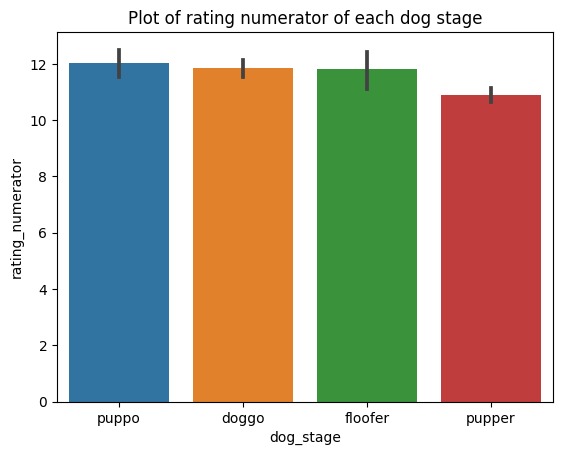

In [938]:
# create an order for barplot
order = twitter_achive_final.groupby(["dog_stage"])["rating_numerator"].mean().sort_values(ascending=False).index

#plot barplot
sns.barplot(x='dog_stage', 
            y='rating_numerator', 
            data= twitter_achive_final,
            order= order)
plt.title('Plot of rating numerator of each dog stage')
plt.show();

The barplot above shows that dog stage Puppo has the highest rating

In [939]:
# displays the correlation between numerical columns  in our dataset
df_corr = twitter_achive_final.corr(numeric_only=True)

In [940]:
df_corr

tweet_id  rating_numerator  rating_denominator        id  \
tweet_id            1.000000          0.040402           -0.026509  1.000000   
rating_numerator    0.040402          1.000000            0.181716  0.040402   
rating_denominator -0.026509          0.181716            1.000000 -0.026509   
id                  1.000000          0.040402           -0.026509  1.000000   
retweet_count       0.388747          0.006403           -0.021425  0.388747   
favorite_count      0.524103          0.006327           -0.021540  0.524103   
img_num             0.202633          0.000683           -0.004638  0.202633   
p1_conf             0.100829         -0.007517           -0.004619  0.100829   
p2_conf             0.007330         -0.019113           -0.032408  0.007330   
p3_conf            -0.043256         -0.004464            0.006884 -0.043256   

                    retweet_count  favorite_count   img_num   p1_conf  \
tweet_id                 0.388747        0.524103  0.202633  0.100829   
rating_numerator         0.006403        0.006327  0.000683 -0.007517   
rating_denominator      -0.021425       -0.021540 -0.004638 -0.004619   
id                       0.388747        0.524103  0.202633  0.100829   
retweet_count            1.000000        0.682273  0.112238  0.040675   
favorite_count           0.682273        1.000000  0.133178  0.063632   
img_num                  0.112238        0.133178  1.000000  0.200373   
p1_conf                  0.040675        0.063632  0.200373  1.000000   
p2_conf                 -0.022314       -0.023829 -0.162251 -0.507664   
p3_conf                 -0.040439       -0.049033 -0.134327 -0.705986   

                     p2_conf   p3_conf  
tweet_id            0.007330 -0.043256  
rating_numerator   -0.019113 -0.004464  
rating_denominator -0.032408  0.006884  
id                  0.007330 -0.043256  
retweet_count      -0.022314 -0.040439  
favorite_count     -0.023829 -0.049033  
img_num            -0.162251 -0.134327  
p1_conf            -0.507664 -0.705986  
p2_conf             1.000000  0.483752  
p3_conf             0.483752  1.000000

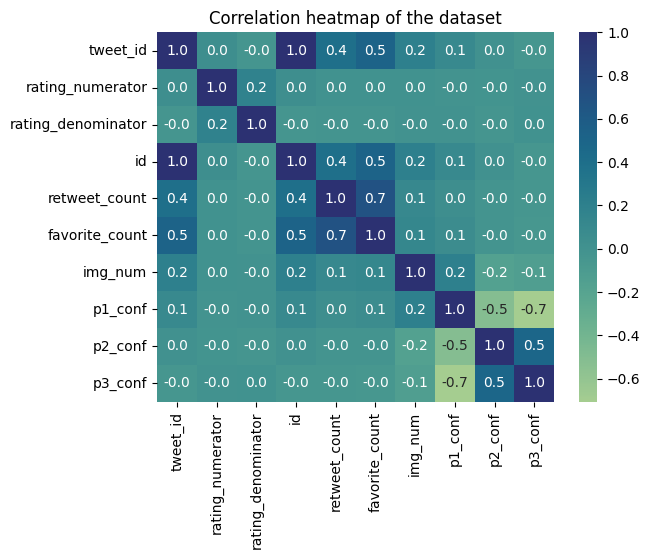

In [941]:
# plot correlation heatmap
hm = sns.heatmap(data= df, cmap='crest', annot=True, fmt= '.1f')
plt.title('Correlation heatmap of the dataset')
plt.show();

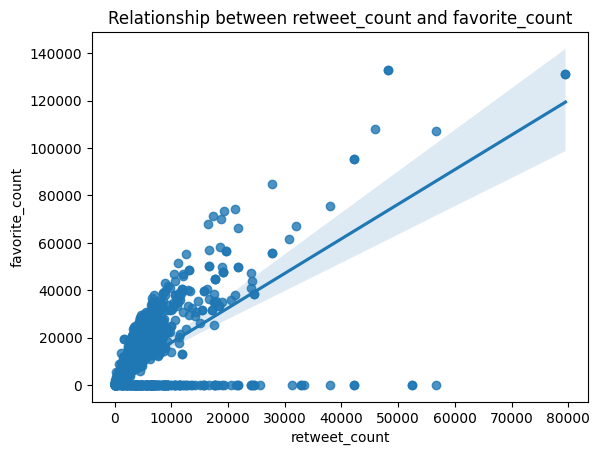

In [942]:
sns.regplot(x='retweet_count', y='favorite_count', data= twitter_achive_final)
plt.title('Relationship between retweet_count and favorite_count')
plt.show();

The Regression plot above shows that favorite count increases as retweet count increases. They are positively correlated